These are data from the study [Shape and Symmetry Determine Two-Dimensional Melting Transitions of Hard Regular Polygons](https://dx.doi.org/10.1103/PhysRevX.7.021001). A selection of the data from the paper are available at [Deep Blue](https://deepblue.lib.umich.edu/data/concern/generic_works/rb68xb988?locale=en) under the [Creative Commons Attribution 4.0 license](https://creativecommons.org/licenses/by/4.0/legalcode). 

The hexatic order parameter $\psi_6$ for each particle is computed using [freud](https://bitbucket.org/glotzer/freud). The angle of $\psi_6$ for each particle, corresponding to the orientation of each particle's nearest 6-neighbor environment, is mapped to the color for the particle.

In [1]:
import freud
import gtar
import json
import numpy as np

import vispy, vispy.app
vispy.app.use_app('pyglet')
import plato
import plato.draw.vispy as draw
import IPython

In [2]:
with gtar.GTAR('hexagons.zip', 'r') as traj:
    positions = traj.readPath('position.f32.ind')
    orientations = traj.readPath('orientation.f32.ind')
    box = traj.readPath('box.f32.uni')
    type_shapes = json.loads(traj.readPath('type_shapes.json'))

vertices = type_shapes[0]['vertices']

In [3]:
hexatic = freud.order.Hexatic(6)
fbox = freud.box.Box(*box, is2D=True)
hexatic.compute((fbox, positions))
angle = np.angle(hexatic.particle_order)

colors = np.ones((positions.shape[0], 4))
colors[:, :3] = plato.cmap.cubeellipse(angle)

<ipython-input-3-e5ef41af96f6>:2: UserWarning: Specifying z-dimensions in a 2-dimensional box has no effect!
  fbox = freud.box.Box(*box, is2D=True)


We use a Voronoi primitive because there are so many particles that it would be difficult to see individual particles at reasonable resolutions for the entire system. To ease the rendering load, we decrease the default `radius` (length scale of the cone used for the Voronoi diagram in vispy) and `num_vertices` (number of vertices comprising the cone used for the vispy Voronoi diagram).

In [4]:
boxmat = [[box[0], box[3]*box[1]],
          [0,             box[1]]]
clip = 2*np.linalg.inv(boxmat)

prim = draw.Voronoi(
    positions=positions[:, :2], orientations=orientations, colors=colors,
    clip_extent=clip, radius=2, num_vertices=6)

scene = draw.Scene(prim, size=(box[0], box[0]), pixel_scale=800/box[0], features=dict(pan=True))
scene.show()

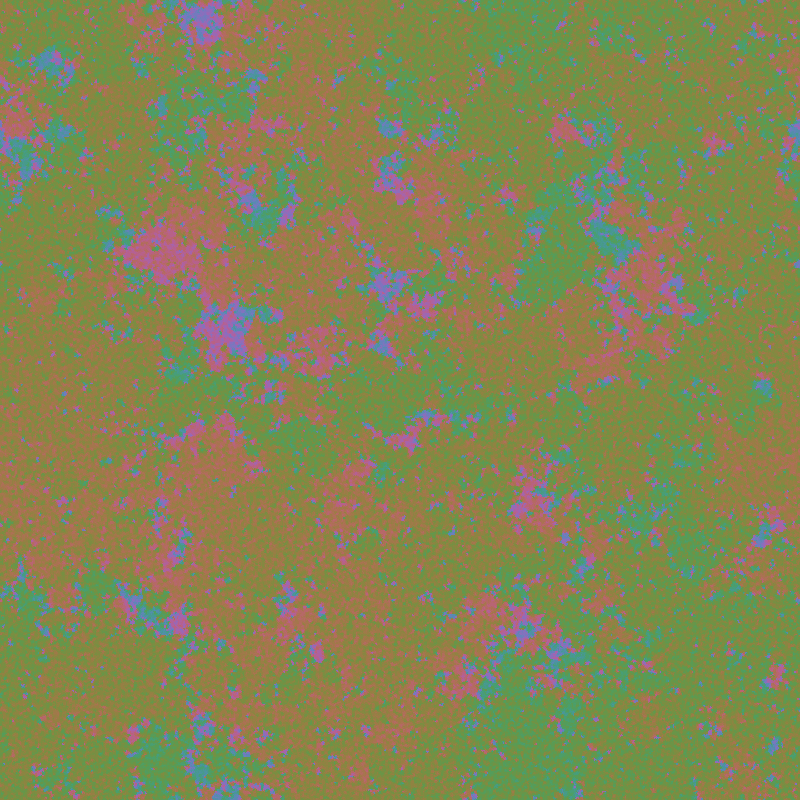

In [5]:
vispy.app.process_events()
target = '../gallery/hexatic_polygons_vispy.png'
scene.save(target)
IPython.display.Image(filename=target)